In [14]:
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler

In [15]:
data1 = pd.read_csv('data1.csv', index_col=0)
data2 = pd.read_csv('data2.csv', index_col=0)

In [16]:
X1, X2 = data1.drop(columns=['Y']), data2.drop(columns=['Y'])
Y1, Y2 = (data1['Y'] - data1['Y'].mean()) / np.linalg.norm(data1['Y']), (data2['Y'] - data2['Y'].mean()) / np.linalg.norm(data2['Y'])
X1 -= np.array(X1.mean()).reshape(1, -1)
X2 -= np.array(X2.mean()).reshape(1, -1)
X1 /= np.linalg.norm(X1, axis=0).reshape(1,-1)
X2 /= np.linalg.norm(X2, axis=0).reshape(1,-1)

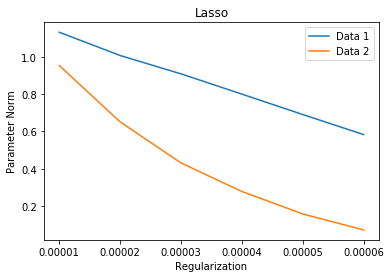

In [17]:
model1norm, model2norm = [], []
reg = np.array([1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5])
model1 = OLS(Y1, X1)
model2 = OLS(Y2, X2)
for alpha in reg:
    params1 = model1.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1).params
    params2 = model2.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1).params
    model1norm.append(np.linalg.norm(params1))
    model2norm.append(np.linalg.norm(params2))
plt.plot(reg, model1norm, label='Data 1')
plt.plot(reg, model2norm, label='Data 2')
plt.xticks(ticks=reg)
plt.xlabel('Regularization')
plt.ylabel('Parameter Norm')
plt.title('Lasso')
plt.legend()
plt.show()

In [18]:
def cross_validation(X, y, alpha, k=5):
    folds = KFold(k)
    mse_ridge, mse_lasso = 0, 0
    for train_idx, test_idx in folds.split(X):
        ridge = OLS(y[train_idx], X[train_idx]).fit_regularized(method='elastic_net', alpha=alpha, L1_wt=0)
        lasso = OLS(y[train_idx], X[train_idx]).fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1)
        mse_ridge += np.sum(np.square(ridge.predict(X[test_idx]) - y[test_idx].flatten()))
        mse_lasso += np.sum(np.square(lasso.predict(X[test_idx]) - y[test_idx].flatten()))
    return mse_ridge / X.shape[0], mse_lasso / X.shape[0]

In [19]:
mse_ridge, mse_lasso = np.empty((2, reg.shape[0])), np.empty((2, reg.shape[0]))
for i, alpha in enumerate(reg):
    ridge1, lasso1 = cross_validation(X1.to_numpy(), Y1.to_numpy(), alpha)
    ridge2, lasso2 = cross_validation(X2.to_numpy(), Y2.to_numpy(), alpha)
    mse_ridge[0, i], mse_ridge[1, i], mse_lasso[0, i], mse_lasso[1, i] = ridge1, ridge2, lasso1, lasso2
print('Reg')
print(reg)
print('Ridge')
print(mse_ridge)
print('Lasso')
print(mse_lasso)

Reg
[1.e-05 2.e-05 3.e-05 4.e-05 5.e-05 6.e-05]
Ridge
[[0.0009588  0.0009471  0.00093682 0.0009277  0.00091959 0.00091234]
 [0.00102321 0.00101061 0.00099953 0.00098971 0.00098094 0.00097309]]
Lasso
[[0.00050628 0.00044676 0.00045112 0.00048136 0.00052783 0.00058744]
 [0.00099394 0.00094352 0.00094818 0.00096691 0.00098502 0.00099387]]


In [20]:
beta1, beta2 = np.zeros(X1.shape[1]), np.zeros(X2.shape[1])
beta1[800:1300:2] = -0.4
beta1[801:1300:2] = 0.4
beta2[550:570:2] = -2
beta2[551:570:2] = 2
p1, p2 = beta1.shape[0], beta2.shape[0]
alpha_ridge_1, alpha_ridge_2, alpha_lasso_1, alpha_lasso_2 = 6e-5, 6e-5, 2e-5, 2e-5
model1 = OLS(Y1, X1)
model2 = OLS(Y2, X2)
error_ridge_1 = np.linalg.norm(model1.fit_regularized(method='elastic_net', alpha=alpha_ridge_1, L1_wt=0).params - beta1) / np.sqrt(p1)
error_ridge_2 = np.linalg.norm(model1.fit_regularized(method='elastic_net', alpha=alpha_ridge_2, L1_wt=0).params - beta2) / np.sqrt(p2)
error_lasso_1 = np.linalg.norm(model1.fit_regularized(method='elastic_net', alpha=alpha_lasso_1, L1_wt=1).params - beta1) / np.sqrt(p1)
error_lasso_2 = np.linalg.norm(model1.fit_regularized(method='elastic_net', alpha=alpha_lasso_2, L1_wt=1).params - beta2) / np.sqrt(p2)
print('Error Ridge data1', error_ridge_1)
print('Error Lasso data1', error_lasso_1)
print('Error Ridge data2', error_ridge_2)
print('Error Lasso data2', error_lasso_2)

Error Ridge data1 0.2000008437000102
Error Lasso data1 0.20000000000000004
Error Ridge data2 0.1999841752396397
Error Lasso data2 0.2
